
# AnalyticsVidya-Women Data Science Hackathon by Bain & Company
## Solution by - Rishi Ran Gupta
### Private rank - 40 , Public rank - 58

### About Hackathon

We call upon all you amazing women data scientists to participate in our all-women, virtual hackathon for a chance to win prizes and/or be fast-tracked on to our recruiting process for the Bengaluru Data Science hub. We know that diversity leads to high-performing, innovative teams and we at Bain strive to get the best and brightest for our clients. And this means you!

### About Bain & Company
Bain & Company is one of the world's leading strategy consulting firms, where bold thinking, inspired people and a passion for results come together for extraordinary impact. This is where aspiration meets innovation, candor fuels collaboration and impossible surrenders to teamwork. We champion the bold to achieve the extraordinary. We’re a global consultancy that helps the world’s most ambitious change makers define the future. Across 58 offices in 37 countries, we work alongside our clients as one team with a shared ambition to achieve extraordinary results, outperform the competition and redefine industries. We complement our tailored, integrated expertise with a vibrant ecosystem of digital innovators to deliver better, faster and more enduring outcomes. Learn more about Bain at https://www.bain.com/

In [1]:
import os, sys, re, string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample.csv')

In [3]:
train.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41


In [4]:
test.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric
0,883,883,1,Development,Course,1,0,1,0.007
1,884,884,1,Development,Course,1,0,1,0.007
2,885,885,1,Development,Course,1,0,1,0.007
3,886,886,1,Development,Course,1,0,1,0.007
4,887,887,1,Development,Course,0,0,1,0.007


In [5]:
sample.head()

,ID,Sales
0,883,5
1,884,5
2,885,5
3,886,5
4,887,5


In [6]:
train.shape, test.shape, sample.shape

((512087, 11), (36000, 9), (36000, 2))

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512087 entries, 0 to 512086
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  512087 non-null  int64  
 1   Day_No              512087 non-null  int64  
 2   Course_ID           512087 non-null  int64  
 3   Course_Domain       512087 non-null  object 
 4   Course_Type         512087 non-null  object 
 5   Short_Promotion     512087 non-null  int64  
 6   Public_Holiday      512087 non-null  int64  
 7   Long_Promotion      512087 non-null  int64  
 8   User_Traffic        512087 non-null  int64  
 9   Competition_Metric  510323 non-null  float64
 10  Sales               512087 non-null  int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 43.0+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  36000 non-null  int64  
 1   Day_No              36000 non-null  int64  
 2   Course_ID           36000 non-null  int64  
 3   Course_Domain       36000 non-null  object 
 4   Course_Type         36000 non-null  object 
 5   Short_Promotion     36000 non-null  int64  
 6   Public_Holiday      36000 non-null  int64  
 7   Long_Promotion      36000 non-null  int64  
 8   Competition_Metric  35880 non-null  float64
dtypes: float64(1), int64(6), object(2)
memory usage: 2.5+ MB


In [9]:
train.describe(include = ['O','float64','int64'])

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
count,512087.000000,512087.000000,512087.000000,512087,512087,512087.000000,512087.000000,512087.000000,512087.000000,510323.000000,512087.000000
unique,NaN,NaN,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Development,Course,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,264295,262747,NaN,NaN,NaN,NaN,NaN,NaN
mean,274007.300650,434.917869,300.388344,NaN,NaN,0.380244,0.031639,0.488968,15375.101198,0.073345,120.826924
std,158228.834029,256.044161,173.365787,NaN,NaN,0.485447,0.175038,0.499879,7727.231205,0.100115,54.355258
min,1.000000,1.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000
25%,136962.500000,214.000000,150.000000,NaN,NaN,0.000000,0.000000,0.000000,10584.000000,0.010000,84.000000
50%,273984.000000,427.000000,300.000000,NaN,NaN,0.000000,0.000000,0.000000,13776.000000,0.035000,111.000000
75%,411065.500000,658.000000,451.000000,NaN,NaN,1.000000,0.000000,1.000000,18123.000000,0.094000,146.000000


In [10]:
test.describe(include = ['O','float64','int64'])

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric
count,36000.000000,36000.000000,36000.000000,36000,36000,36000.000000,36000.000000,36000.000000,35880.000000
unique,NaN,NaN,NaN,4,3,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Development,Course,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,18480,18600,NaN,NaN,NaN,NaN
mean,274566.035000,912.500000,300.500000,NaN,NaN,0.400000,0.010972,0.501667,0.072938
std,158083.869473,17.318343,173.207246,NaN,NaN,0.489905,0.104174,0.500004,0.099412
min,883.000000,883.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,137730.250000,897.750000,150.750000,NaN,NaN,0.000000,0.000000,0.000000,0.010000
50%,274761.500000,912.500000,300.500000,NaN,NaN,0.000000,0.000000,1.000000,0.034500
75%,410872.750000,927.250000,450.250000,NaN,NaN,1.000000,0.000000,1.000000,0.094000


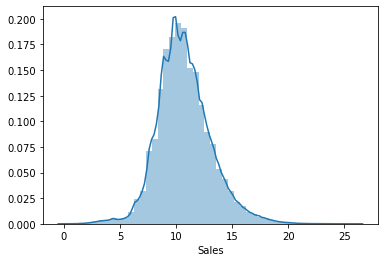

In [11]:
import seaborn as sns
sns.distplot(train.Sales**(1/2))

In [12]:
train.Sales = np.sqrt(train.Sales)

0.6278982037999001 2.035406461956848


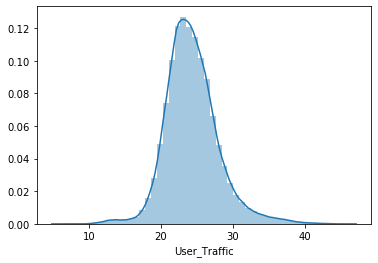

In [13]:
import seaborn as sns
sns.distplot(train.User_Traffic**(1/3))
print((train.User_Traffic**(1/3)).skew(), (train.User_Traffic**(1/3)).kurt())

In [14]:
train.User_Traffic = train.User_Traffic**(1/3)

In [15]:
q1 = train.Sales.quantile(0.25)
q3 = train.Sales.quantile(0.75)
iqr = q3-q1
lower = q1 - 2*iqr
upper = q3 + 2*iqr
l_index = train[pd.DataFrame(np.where(train.Sales >upper, True, False))[0]].index
u_index = train[pd.DataFrame(np.where(train.Sales <lower, True, False))[0]].index
print('lower {} and upper {}'.format(len(l_index), len(u_index)))

lower 3595 and upper 1446


In [16]:
train.drop(index = l_index, inplace = True)
train.drop(index = u_index, inplace = True)
train.reset_index(drop= True, inplace = True)

In [18]:
q1 = train.User_Traffic.quantile(0.25)
q3 = train.User_Traffic.quantile(0.75)
iqr = q3-q1
lower = q1 - 2.5*iqr
upper = q3 + 2.5*iqr
l_index = train[pd.DataFrame(np.where(train.User_Traffic >upper, True, False))[0]].index
u_index = train[pd.DataFrame(np.where(train.User_Traffic <lower, True, False))[0]].index
print('lower {} and upper {}'.format(len(l_index), len(u_index)))

lower 2116 and upper 3


In [19]:
train.drop(index = l_index, inplace = True)
train.drop(index = u_index, inplace = True)
train.reset_index(drop= True, inplace = True)

In [20]:
test['Sales'] = np.NAN
df = train.append(test, ignore_index=True)
df.sort_values(by = 'ID')
del df['ID']

0.294398234289217 0.3515307313107492


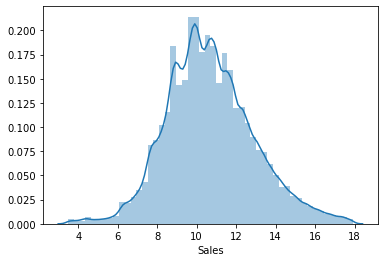

In [21]:
import seaborn as sns
sns.distplot(df.Sales)
print(df.Sales.skew(), df.Sales.kurt())

# Day

In [22]:
df.head()

,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,Development,Course,0,1,1,22.242496,0.007,9.000000
1,2,1,Development,Course,0,0,1,23.898880,0.007,8.888194
2,3,1,Development,Course,0,0,1,22.672744,0.007,8.660254
3,4,1,Development,Course,0,0,1,22.928575,0.007,8.944272
4,5,1,Development,Course,0,0,1,18.949079,0.007,6.403124


In [23]:
%%time
import datetime
def convert(x):
    return(pd.to_datetime('31/12/2016')+datetime.timedelta(x))

df['DateTime'] = df.Day_No.apply(lambda x: convert(x))

Wall time: 1min 57s


In [24]:
df['day'] = df.DateTime.dt.day
df['month'] = df.DateTime.dt.month
df['year'] = df.DateTime.dt.year
df['weekday'] = df.DateTime.dt.weekday
df['dayofweek'] = df.DateTime.dt.dayofweek
df['dayofyear'] = df.DateTime.dt.dayofyear
df['weekofyear'] = df.DateTime.dt.weekofyear

del df['DateTime']

In [25]:
df.columns

Index(['Day_No', 'Course_ID', 'Course_Domain', 'Course_Type',
       'Short_Promotion', 'Public_Holiday', 'Long_Promotion', 'User_Traffic',
       'Competition_Metric', 'Sales', 'day', 'month', 'year', 'weekday',
       'dayofweek', 'dayofyear', 'weekofyear'],
      dtype='object')

In [26]:
cat_columns = ['Course_Domain', 'Course_Type', 'Short_Promotion', 'Public_Holiday', 'Long_Promotion','Course_ID']

import seaborn as sns
fig, ax = plt.subplots(3,3, figsize = (20,14))
i = 1
for c in df.columns[1:10]:
    plt.subplot(3,3,i)
    if c in cat_columns:
        sns.boxplot(x = df[c], y = df.Day_No)
    else :
        sns.scatterplot(x = df[c], y =df.Day_No)
    i = i+1


# CourseID

In [27]:
df.columns

Index(['Day_No', 'Course_ID', 'Course_Domain', 'Course_Type',
       'Short_Promotion', 'Public_Holiday', 'Long_Promotion', 'User_Traffic',
       'Competition_Metric', 'Sales', 'day', 'month', 'year', 'weekday',
       'dayofweek', 'dayofyear', 'weekofyear'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540927 entries, 0 to 540926
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Day_No              540927 non-null  int64  
 1   Course_ID           540927 non-null  int64  
 2   Course_Domain       540927 non-null  object 
 3   Course_Type         540927 non-null  object 
 4   Short_Promotion     540927 non-null  int64  
 5   Public_Holiday      540927 non-null  int64  
 6   Long_Promotion      540927 non-null  int64  
 7   User_Traffic        504927 non-null  float64
 8   Competition_Metric  539052 non-null  float64
 9   Sales               504927 non-null  float64
 10  day                 540927 non-null  int64  
 11  month               540927 non-null  int64  
 12  year                540927 non-null  int64  
 13  weekday             540927 non-null  int64  
 14  dayofweek           540927 non-null  int64  
 15  dayofyear           540927 non-nul

In [29]:
df[df.Competition_Metric.isnull()]

,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales,day,month,year,weekday,dayofweek,dayofyear,weekofyear
147629,1,176,Software Marketing,Course,0,1,0,23.008189,NaN,10.954451,1,1,2017,6,6,1,52
147630,2,176,Software Marketing,Course,0,0,0,26.398209,NaN,11.747340,2,1,2017,0,0,2,1
147631,3,176,Software Marketing,Course,0,0,0,26.347888,NaN,11.489125,3,1,2017,1,1,3,1
147632,4,176,Software Marketing,Course,0,0,0,26.832988,NaN,11.789826,4,1,2017,2,2,4,1
147633,5,176,Software Marketing,Course,0,0,0,22.631819,NaN,9.746794,5,1,2017,3,3,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526162,938,354,Development,Program,1,0,0,NaN,NaN,NaN,27,7,2019,5,5,208,30
526163,939,354,Development,Program,1,0,0,NaN,NaN,NaN,28,7,2019,6,6,209,30
526164,940,354,Development,Program,1,0,0,NaN,NaN,NaN,29,7,2019,0,0,210,31
526165,941,354,Development,Program,1,0,0,NaN,NaN,NaN,30,7,2019,1,1,211,31


In [30]:
df.Competition_Metric = df.groupby(['Day_No','Course_Domain', 'Course_Type'])['Competition_Metric'].apply(lambda x: x.fillna(x.mean()))

In [31]:
df.sort_values(by = 'Day_No', ascending = True).groupby(['Course_ID', 'Course_Domain', 'Course_Type'])['User_Traffic'].sum()

Course_ID  Course_Domain         Course_Type
1          Development           Course         19865.279784
2          Development           Course         21801.643592
3          Development           Program        23476.511913
4          Development           Course         20613.348914
5          Development           Program        20018.858083
                                                    ...     
596        Development           Program        19728.719493
597        Development           Course         18330.985171
598        Finance & Accounting  Program        21740.624138
599        Development           Program        21575.239991
600        Software Marketing    Program        18080.076411
Name: User_Traffic, Length: 600, dtype: float64

In [32]:
df.Course_Type.value_counts()

Course     278923
Program    261479
Degree        525
Name: Course_Type, dtype: int64

In [33]:
#df.Course_ID = df.Course_ID.astype('category')

In [34]:
df.columns

Index(['Day_No', 'Course_ID', 'Course_Domain', 'Course_Type',
       'Short_Promotion', 'Public_Holiday', 'Long_Promotion', 'User_Traffic',
       'Competition_Metric', 'Sales', 'day', 'month', 'year', 'weekday',
       'dayofweek', 'dayofyear', 'weekofyear'],
      dtype='object')

import seaborn as sns
fig, ax = plt.subplots(3,3, figsize = (20,14))
i = 1
for c in df.columns[0:9]:
    plt.subplot(3,3,i)
    if c in cat_columns:
        sns.boxplot(x = df[c], y = df.Sales)
    else :
        sns.scatterplot(x = df[c], y =df.Sales)
    i = i+1

sns.scatterplot(df.User_Traffic, df.Sales**2)

In [35]:
df.head()

,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales,day,month,year,weekday,dayofweek,dayofyear,weekofyear
0,1,1,Development,Course,0,1,1,22.242496,0.007,9.000000,1,1,2017,6,6,1,52
1,2,1,Development,Course,0,0,1,23.898880,0.007,8.888194,2,1,2017,0,0,2,1
2,3,1,Development,Course,0,0,1,22.672744,0.007,8.660254,3,1,2017,1,1,3,1
3,4,1,Development,Course,0,0,1,22.928575,0.007,8.944272,4,1,2017,2,2,4,1
4,5,1,Development,Course,0,0,1,18.949079,0.007,6.403124,5,1,2017,3,3,5,1


In [36]:
df.Course_ID = df.Course_ID.astype('category')

In [37]:
df = pd.get_dummies(df)

In [38]:
#del df['User_Traffic']

In [39]:
test = df[df.Sales.isnull()]
test.reset_index(drop = True, inplace = True)

In [40]:
train = df[df.Sales.notnull()]
train.reset_index(drop = True , inplace = True)

In [41]:
train_label = train.Sales
del train['Sales']
del test['Sales']

In [42]:
train.shape , test.shape

((504927, 620), (36000, 620))

# ML

In [43]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import make_scorer, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split, KFold

In [44]:
def folds(train, model, label = train_label, xg_boost = None, lg_boost = None, keras = None,param = None, testset = test, 
          sample = sample):
    
    predicted = pd.DataFrame(np.zeros(shape = (label.shape[0],1)))
    df  =  pd.DataFrame(np.zeros(shape = (testset.shape[0],2)))
    df.columns = sample.columns
    df.ID = sample.ID
    predicted.columns = ['Sales']
    
    kfold = KFold(n_splits=5, shuffle=True, random_state=2342)
    for t_ind, v_ind in kfold.split(train.values):
        xtrain , ytrain = train.loc[t_ind,:], label[t_ind]
        xval , yval = train.loc[v_ind,:], label[v_ind]
        
        if xg_boost is not None :
            training = xgb.DMatrix(xtrain, ytrain)
            testing = xgb.DMatrix(xval, yval)
            model = xgb.train(param , training, evals = [(training, 'training'),(testing, 'testing')],
                             num_boost_round = 120, early_stopping_rounds = 20, verbose_eval = 5)
            predicted.loc[v_ind,'Sales'] = model.predict(testing, ntree_limit= model.best_ntree_limit)
            df.loc[:,'Sales'] = model.predict(xgb.DMatrix(testset), ntree_limit= model.best_ntree_limit)
        
        elif lg_boost is not None :
            training = lgb.Dataset(xtrain, ytrain)
            testing = lgb.Dataset(xval, yval, reference=training)
            model = lgb.train(param , training, valid_sets = [training,testing],
                             num_boost_round = 2000, early_stopping_rounds = 200, verbose_eval = 5)
            predicted.loc[v_ind,'Sales'] = model.predict(xval, best_iteration= model.best_iteration)
            df.loc[:,'Sales'] = model.predict(testset, best_iteration = model.best_iteration)
        
        elif keras :
            model.fit(xtrain, ytrain, epochs = param['epochs'], batch_size = param['batch_size'])
            predicted.loc[v_ind,:] = model.predict(xval)
            
            df.loc[:,'Sales'] = model.predict(testset)
        
        else :
            model.fit(xtrain, ytrain)
            predicted.loc[v_ind,0] = model.predict(xval)
    
    if xg_boost is not None or lg_boost is not None :
        print('RMSLE: \n%s' %(1000*np.sqrt(np.mean((np.log1p(predicted.Sales**2) - np.log1p(label**2))**2))))
        print('MSE:\n%s'  %(mean_squared_error(predicted.Sales**2, label**2)))
        print('RMSE:\n%s'  %(np.sqrt((mean_squared_error(predicted.Sales**2, label**2)))))
        print('R2:\n%s'  %(r2_score(predicted.Sales**2, label**2)))
        if xg_boost is not None:
            plt.figure(figsize = (14,5))
            xgb.plot_importance(model)
        else:
            plt.figure(figsize = (14,5))
            lgb.plot_importance(model)
        
    else :
        print('RMSLE: \n%s' %(1000*np.sqrt(np.mean((np.log1p(predicted.Sales**2) - np.log1p(label**2))**2))))
        print('MSE:\n%s'  %(mean_squared_error(predicted.Sales**2, label**2)))
        print('RMSE:\n%s'  %(np.sqrt((mean_squared_error(predicted.Sales**2, label**2)))))
        
    return(df)

In [46]:
%%time
x = []
import warnings
warnings.filterwarnings(action = 'ignore')
for c in range(1,601):
    model = lgb.LGBMRegressor(random_state = 99)
    model.fit(train[train['Course_ID_{}'.format(c)] == 1].drop(columns = 'User_Traffic'), 
                    train[train['Course_ID_{}'.format(c)] == 1]['User_Traffic'])
    t = model.predict(test[test['Course_ID_{}'.format(c)] == 1].drop(columns = 'User_Traffic'))
    #x.append(cross_val_score(RandomForestRegressor(random_state=99), train[train['Course_ID_{}'.format(c)] == 1].drop(columns = 'User_Traffic'), 
    #                train[train['Course_ID_{}'.format(c)] == 1]['User_Traffic'], cv = 3, scoring = 'neg_mean_squared_error'))
    
    test.loc[test['Course_ID_{}'.format(c)] == 1,'User_Traffic'] = t
    if c %20 == 0 :
        print(c)

20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
Wall time: 1min 43s


In [175]:
import plaidml.keras
import os 
plaidml.keras.install_backend()
os.environ['KERAS_BACKEND'] = "plaidml.keras.backend"

In [176]:
from keras.layers import Embedding, Dense, Flatten, LSTM, Bidirectional, Dropout, BatchNormalization
from keras.models import Sequential

In [177]:
seed = 40
import random
np.random.seed(seed)
random.seed(seed)

In [178]:
model = Sequential()
model.add(Embedding(output_dim = 32,input_length = 20, input_dim = 1))
model.add(Bidirectional(LSTM(64, return_sequences = True)))
model.add(Dropout(p =0.5))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(p =0.3))
model.add(BatchNormalization())
model.add(Dense(256))
model.add(Dropout(p =0.4))
model.add(BatchNormalization())
model.add(Dense(64))
model.add(Dropout(p =0.5))
model.add(BatchNormalization())
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

INFO:plaidml:Opening device "opencl_amd_hainan.0"
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.5)`
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.3)`
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.4)`
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.5)`
  del sys.path[0]


In [179]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 32)            32        
_________________________________________________________________
bidirectional_1 (Bidirection (None, 20, 128)           49664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 128)           0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 20, 128)           512       
_________________________________________________________________
flatten_1 (Flatten)          (None, 2560)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2560)              0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 2560)              10240     
__________

In [143]:
%%time
param = dict()
param['batch_size'] = 64
param['epochs'] = 1
lr_ovr = folds(train, model = model, keras=True ,param=param , testset = test)

Epoch 1/1


INFO:plaidml:Analyzing Ops: 2283 of 4739 operations complete


337984/338030 [============================>.] - ETA: 0s - loss: 9.1894- ETA:

INFO:plaidml:Analyzing Ops: 1610 of 4739 operations complete
INFO:plaidml:Analyzing Ops: 4148 of 4739 operations complete


338030/338030 [==============================] - 612s 2ms/step - loss: 9.1887


INFO:plaidml:Analyzing Ops: 1697 of 1757 operations complete


Epoch 1/1
337984/338031 [============================>.] - ETA: 0s - loss: 5.0339

INFO:plaidml:Analyzing Ops: 2562 of 4739 operations complete


338031/338031 [==============================] - 599s 2ms/step - loss: 5.0341
Epoch 1/1
338031/338031 [==============================] - 561s 2ms/step - loss: 5.0372
RMSLE: 
430.9820838579657
MSE:
2543.981484449773
RMSE:
50.43789730400914
Wall time: 37min 13s


In [180]:
test

,Day_No,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,day,month,year,weekday,...,Course_ID_598,Course_ID_599,Course_ID_600,Course_Domain_Business,Course_Domain_Development,Course_Domain_Finance & Accounting,Course_Domain_Software Marketing,Course_Type_Course,Course_Type_Degree,Course_Type_Program
0,883,1,0,1,24.124817,0.007,2,6,2019,6,...,0,0,0,0,1,0,0,1,0,0
1,884,1,0,1,25.458508,0.007,3,6,2019,0,...,0,0,0,0,1,0,0,1,0,0
2,885,1,0,1,24.816190,0.007,4,6,2019,1,...,0,0,0,0,1,0,0,1,0,0
3,886,1,0,1,23.956467,0.007,5,6,2019,2,...,0,0,0,0,1,0,0,1,0,0
4,887,0,0,1,22.775579,0.007,6,6,2019,3,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,938,1,0,1,22.674222,0.070,27,7,2019,5,...,0,0,1,0,0,0,1,0,0,1
35996,939,1,0,1,21.758407,0.070,28,7,2019,6,...,0,0,1,0,0,0,1,0,0,1
35997,940,1,0,1,21.994958,0.070,29,7,2019,0,...,0,0,1,0,0,0,1,0,0,1
35998,941,1,0,1,22.683305,0.070,30,7,2019,1,...,0,0,1,0,0,0,1,0,0,1


Training until validation scores don't improve for 200 rounds
[5]	training's rmse: 0.729165	valid_1's rmse: 0.730315
[10]	training's rmse: 0.592986	valid_1's rmse: 0.594302
[15]	training's rmse: 0.514761	valid_1's rmse: 0.515774
[20]	training's rmse: 0.469133	valid_1's rmse: 0.469223
[25]	training's rmse: 0.431569	valid_1's rmse: 0.432068
[30]	training's rmse: 0.408633	valid_1's rmse: 0.410452
[35]	training's rmse: 0.393017	valid_1's rmse: 0.395404
[40]	training's rmse: 0.38197	valid_1's rmse: 0.384294
[45]	training's rmse: 0.373389	valid_1's rmse: 0.376301
[50]	training's rmse: 0.362553	valid_1's rmse: 0.365408
[55]	training's rmse: 0.352519	valid_1's rmse: 0.355769
[60]	training's rmse: 0.346008	valid_1's rmse: 0.349957
[65]	training's rmse: 0.341026	valid_1's rmse: 0.345183
[70]	training's rmse: 0.335278	valid_1's rmse: 0.339639
[75]	training's rmse: 0.331815	valid_1's rmse: 0.33646
[80]	training's rmse: 0.327449	valid_1's rmse: 0.332605
[85]	training's rmse: 0.322694	valid_1's rmse

[725]	training's rmse: 0.237945	valid_1's rmse: 0.281093
[730]	training's rmse: 0.237673	valid_1's rmse: 0.28109
[735]	training's rmse: 0.237444	valid_1's rmse: 0.281089
[740]	training's rmse: 0.237234	valid_1's rmse: 0.281073
[745]	training's rmse: 0.237039	valid_1's rmse: 0.281034
[750]	training's rmse: 0.236803	valid_1's rmse: 0.281042
[755]	training's rmse: 0.236593	valid_1's rmse: 0.281048
[760]	training's rmse: 0.236419	valid_1's rmse: 0.281049
[765]	training's rmse: 0.236153	valid_1's rmse: 0.280999
[770]	training's rmse: 0.235926	valid_1's rmse: 0.281022
[775]	training's rmse: 0.235681	valid_1's rmse: 0.281047
[780]	training's rmse: 0.235403	valid_1's rmse: 0.281055
[785]	training's rmse: 0.235155	valid_1's rmse: 0.281036
[790]	training's rmse: 0.234947	valid_1's rmse: 0.281093
[795]	training's rmse: 0.234675	valid_1's rmse: 0.28106
[800]	training's rmse: 0.234442	valid_1's rmse: 0.281074
[805]	training's rmse: 0.234133	valid_1's rmse: 0.280999
[810]	training's rmse: 0.233884	v

[340]	training's rmse: 0.266847	valid_1's rmse: 0.290938
[345]	training's rmse: 0.266381	valid_1's rmse: 0.290843
[350]	training's rmse: 0.265789	valid_1's rmse: 0.290427
[355]	training's rmse: 0.265247	valid_1's rmse: 0.290129
[360]	training's rmse: 0.264748	valid_1's rmse: 0.289868
[365]	training's rmse: 0.264264	valid_1's rmse: 0.289718
[370]	training's rmse: 0.26384	valid_1's rmse: 0.289493
[375]	training's rmse: 0.263513	valid_1's rmse: 0.289433
[380]	training's rmse: 0.263074	valid_1's rmse: 0.289199
[385]	training's rmse: 0.262683	valid_1's rmse: 0.28915
[390]	training's rmse: 0.262122	valid_1's rmse: 0.288759
[395]	training's rmse: 0.261477	valid_1's rmse: 0.288316
[400]	training's rmse: 0.260769	valid_1's rmse: 0.287962
[405]	training's rmse: 0.260423	valid_1's rmse: 0.287911
[410]	training's rmse: 0.26	valid_1's rmse: 0.287683
[415]	training's rmse: 0.259455	valid_1's rmse: 0.28737
[420]	training's rmse: 0.259064	valid_1's rmse: 0.287206
[425]	training's rmse: 0.2587	valid_1'

[1065]	training's rmse: 0.225412	valid_1's rmse: 0.282286
[1070]	training's rmse: 0.225223	valid_1's rmse: 0.282291
[1075]	training's rmse: 0.225081	valid_1's rmse: 0.282321
[1080]	training's rmse: 0.224936	valid_1's rmse: 0.282371
[1085]	training's rmse: 0.224773	valid_1's rmse: 0.282272
[1090]	training's rmse: 0.224568	valid_1's rmse: 0.282335
[1095]	training's rmse: 0.224386	valid_1's rmse: 0.282322
[1100]	training's rmse: 0.224227	valid_1's rmse: 0.282303
[1105]	training's rmse: 0.224054	valid_1's rmse: 0.282379
[1110]	training's rmse: 0.22391	valid_1's rmse: 0.282394
[1115]	training's rmse: 0.223768	valid_1's rmse: 0.282386
[1120]	training's rmse: 0.223599	valid_1's rmse: 0.282379
[1125]	training's rmse: 0.223451	valid_1's rmse: 0.282383
[1130]	training's rmse: 0.223273	valid_1's rmse: 0.282369
[1135]	training's rmse: 0.223059	valid_1's rmse: 0.282407
[1140]	training's rmse: 0.222895	valid_1's rmse: 0.282426
[1145]	training's rmse: 0.222756	valid_1's rmse: 0.282449
[1150]	training

[500]	training's rmse: 0.253747	valid_1's rmse: 0.285458
[505]	training's rmse: 0.253385	valid_1's rmse: 0.285372
[510]	training's rmse: 0.253078	valid_1's rmse: 0.285191
[515]	training's rmse: 0.252635	valid_1's rmse: 0.284981
[520]	training's rmse: 0.252332	valid_1's rmse: 0.284887
[525]	training's rmse: 0.251984	valid_1's rmse: 0.284781
[530]	training's rmse: 0.251574	valid_1's rmse: 0.284643
[535]	training's rmse: 0.251276	valid_1's rmse: 0.284545
[540]	training's rmse: 0.250944	valid_1's rmse: 0.284402
[545]	training's rmse: 0.250438	valid_1's rmse: 0.284328
[550]	training's rmse: 0.250121	valid_1's rmse: 0.284338
[555]	training's rmse: 0.249857	valid_1's rmse: 0.284397
[560]	training's rmse: 0.249525	valid_1's rmse: 0.284264
[565]	training's rmse: 0.24929	valid_1's rmse: 0.284272
[570]	training's rmse: 0.248869	valid_1's rmse: 0.284473
[575]	training's rmse: 0.24866	valid_1's rmse: 0.284457
[580]	training's rmse: 0.248358	valid_1's rmse: 0.284402
[585]	training's rmse: 0.24802	va

Training until validation scores don't improve for 200 rounds
[5]	training's rmse: 0.721971	valid_1's rmse: 0.720572
[10]	training's rmse: 0.585846	valid_1's rmse: 0.585296
[15]	training's rmse: 0.513044	valid_1's rmse: 0.513949
[20]	training's rmse: 0.4624	valid_1's rmse: 0.463331
[25]	training's rmse: 0.435636	valid_1's rmse: 0.437658
[30]	training's rmse: 0.41034	valid_1's rmse: 0.412364
[35]	training's rmse: 0.396833	valid_1's rmse: 0.399249
[40]	training's rmse: 0.383572	valid_1's rmse: 0.386326
[45]	training's rmse: 0.372729	valid_1's rmse: 0.376264
[50]	training's rmse: 0.363473	valid_1's rmse: 0.367261
[55]	training's rmse: 0.351992	valid_1's rmse: 0.356121
[60]	training's rmse: 0.344606	valid_1's rmse: 0.349433
[65]	training's rmse: 0.339808	valid_1's rmse: 0.345208
[70]	training's rmse: 0.335869	valid_1's rmse: 0.341472
[75]	training's rmse: 0.331252	valid_1's rmse: 0.337017
[80]	training's rmse: 0.326987	valid_1's rmse: 0.333336
[85]	training's rmse: 0.323047	valid_1's rmse:

[725]	training's rmse: 0.23846	valid_1's rmse: 0.283473
[730]	training's rmse: 0.238212	valid_1's rmse: 0.283532
[735]	training's rmse: 0.237988	valid_1's rmse: 0.283519
[740]	training's rmse: 0.23768	valid_1's rmse: 0.283543
[745]	training's rmse: 0.237446	valid_1's rmse: 0.283533
[750]	training's rmse: 0.237298	valid_1's rmse: 0.283571
[755]	training's rmse: 0.237048	valid_1's rmse: 0.283503
[760]	training's rmse: 0.236833	valid_1's rmse: 0.283539
[765]	training's rmse: 0.23661	valid_1's rmse: 0.28359
[770]	training's rmse: 0.236441	valid_1's rmse: 0.283556
[775]	training's rmse: 0.236197	valid_1's rmse: 0.283492
[780]	training's rmse: 0.235969	valid_1's rmse: 0.283526
[785]	training's rmse: 0.23575	valid_1's rmse: 0.283513
[790]	training's rmse: 0.235571	valid_1's rmse: 0.283461
[795]	training's rmse: 0.235383	valid_1's rmse: 0.283477
[800]	training's rmse: 0.235144	valid_1's rmse: 0.283488
[805]	training's rmse: 0.234955	valid_1's rmse: 0.283521
[810]	training's rmse: 0.234758	vali

[285]	training's rmse: 0.272047	valid_1's rmse: 0.292472
[290]	training's rmse: 0.271543	valid_1's rmse: 0.292317
[295]	training's rmse: 0.271194	valid_1's rmse: 0.292165
[300]	training's rmse: 0.270779	valid_1's rmse: 0.292016
[305]	training's rmse: 0.270339	valid_1's rmse: 0.291801
[310]	training's rmse: 0.269617	valid_1's rmse: 0.291373
[315]	training's rmse: 0.268834	valid_1's rmse: 0.291209
[320]	training's rmse: 0.267968	valid_1's rmse: 0.29072
[325]	training's rmse: 0.267419	valid_1's rmse: 0.29054
[330]	training's rmse: 0.26698	valid_1's rmse: 0.290387
[335]	training's rmse: 0.26644	valid_1's rmse: 0.29017
[340]	training's rmse: 0.266035	valid_1's rmse: 0.290103
[345]	training's rmse: 0.265414	valid_1's rmse: 0.289977
[350]	training's rmse: 0.265014	valid_1's rmse: 0.28992
[355]	training's rmse: 0.263941	valid_1's rmse: 0.289032
[360]	training's rmse: 0.263271	valid_1's rmse: 0.288621
[365]	training's rmse: 0.262699	valid_1's rmse: 0.288336
[370]	training's rmse: 0.262262	valid

[1015]	training's rmse: 0.22632	valid_1's rmse: 0.281747
[1020]	training's rmse: 0.226151	valid_1's rmse: 0.281717
[1025]	training's rmse: 0.225974	valid_1's rmse: 0.281654
[1030]	training's rmse: 0.225775	valid_1's rmse: 0.281638
[1035]	training's rmse: 0.225606	valid_1's rmse: 0.281624
[1040]	training's rmse: 0.225424	valid_1's rmse: 0.281621
[1045]	training's rmse: 0.225203	valid_1's rmse: 0.281601
[1050]	training's rmse: 0.225037	valid_1's rmse: 0.281555
[1055]	training's rmse: 0.224871	valid_1's rmse: 0.281512
[1060]	training's rmse: 0.224691	valid_1's rmse: 0.281517
[1065]	training's rmse: 0.224503	valid_1's rmse: 0.281544
[1070]	training's rmse: 0.224309	valid_1's rmse: 0.281572
[1075]	training's rmse: 0.224122	valid_1's rmse: 0.281586
[1080]	training's rmse: 0.223881	valid_1's rmse: 0.281511
[1085]	training's rmse: 0.223706	valid_1's rmse: 0.281481
[1090]	training's rmse: 0.223505	valid_1's rmse: 0.281455
[1095]	training's rmse: 0.223354	valid_1's rmse: 0.281458
[1100]	training

<Figure size 1008x360 with 0 Axes>

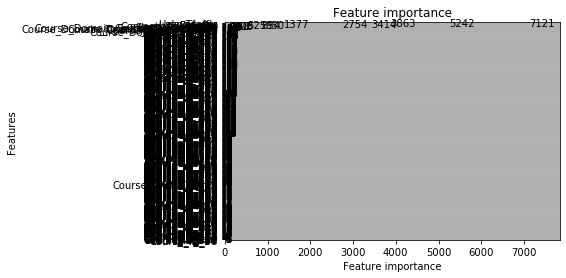

In [47]:
%%time
param = dict()
param['objective'] = 'regression'
param['metric'] = 'rmse'
param['seed'] = 456456
param['learning_rate'] = 0.8
lr_ovr = folds(train, model = lgb, lg_boost=True ,param=param , testset = test)

In [48]:
lr_ovr.Sales = lr_ovr.Sales**2

In [49]:
lr_ovr.to_csv('answer.csv', index = False)

In [184]:
%%time
param = dict()
param['objective'] = 'reg:linear'
param['metric'] = 'rmse'
param['seed'] = 2013
param['learning_rate'] = 0.9
x_ovr = folds(train, model = xgb, xg_boost=True ,param=param , testset = test)

[14:41:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	training-rmse:1.37633	testing-rmse:1.37803
Multiple eval metrics have been passed: 'testing-rmse' will be used for early stopping.

Will train until testing-rmse hasn't improved in 20 rounds.
[5]	training-rmse:0.744922	testing-rmse:0.7477
[10]	training-rmse:0.694678	testing-rmse:0.69846


KeyboardInterrupt: 